In [48]:
#1 create gray scale funtions
import numpy as np
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def Hist_Equal(im):
    level = np.array(im)
    level = level.ravel()
    hight,loc= np.histogram(level,bins=256)
    loc=loc[:-1]
    plt.plot(loc,hight)
    plt.show()
    
    total=np.sum(hight)#total num of pixils
    #create new image
    col = len(im)
    row = len(im[0])
    out = [[0 for x in range(row)] for y in range(col)] 
    
    n = 0
    while n < col:
        i = 0
        while i < row:
            index = np.where(loc<im[n][i])
            num = np.sum(hight[index])
            out[n][i]= num/total *255
            i+=1
        n+=1
    return out
    


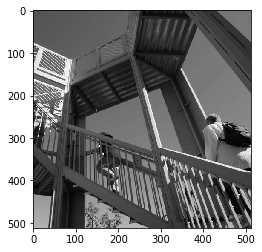

In [49]:
import scipy.misc

ascent = scipy.misc.ascent()
plt.gray()
plt.imshow(ascent)
plt.show()

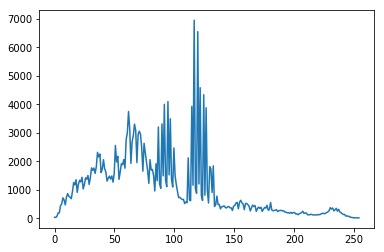

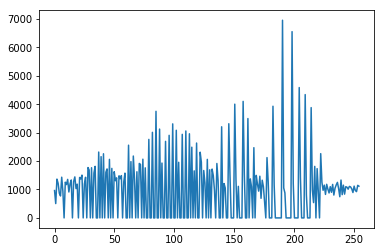

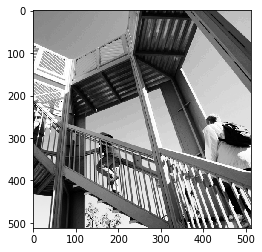

In [56]:
#1.b test the function
out = Hist_Equal(ascent)
flat = np.array(out)
flat = flat.ravel()
y,x = np.histogram(flat,bins = 256)
x=x[:-1]
plt.plot(x,y)
plt.show()
plt.imshow(out)
plt.show()
#works well enough, made everything brighter

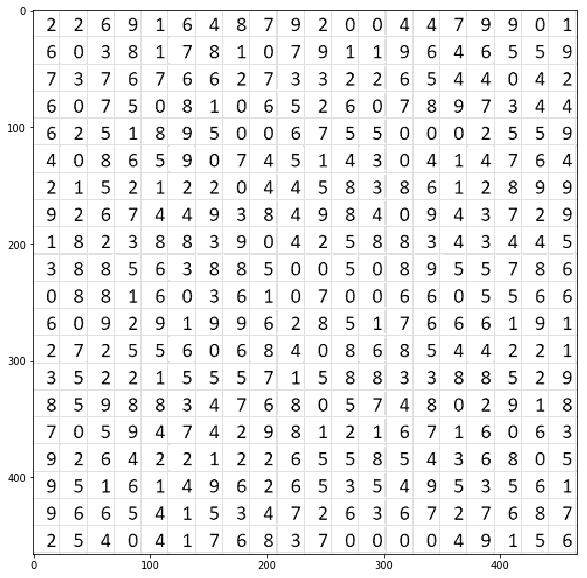

2


In [135]:
#2.find pattern in image
#a) import the image
import matplotlib.image as mpimg
def rgb2gray(rgb):

    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img1=mpimg.imread("400rand.png")
img1=np.array(img1)
gray1 = np.floor(rgb2gray(img1)*8+0.5)
plt.figure(figsize=(10,10))
plt.imshow(gray1)
plt.show()
#fixed 3d version of the temp
print(len(gray1.shape))

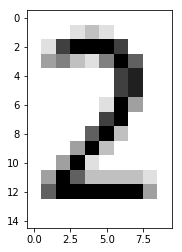

In [129]:
#b)clip out the 2
y1=5
y2=20
x1=11
x2=21
template = np.copy(gray1[y1:y2, x1:x2])
template-=template.mean()

plt.imshow(template)
plt.show()
#make sure it's array
img2=np.array(img2)
template = np.array(template)

In [132]:
#2.c)convolute the image
from scipy import signal
corr = signal.correlate2d(gray1,template,boundary='symm', mode='same')

<function matplotlib.pyplot.show(*args, **kw)>

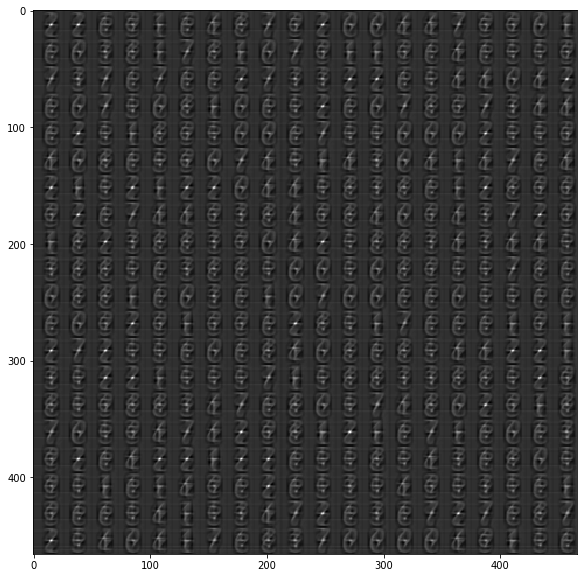

In [136]:
#2.d) show the image
plt.figure(figsize=(10,10))
plt.imshow(corr)
plt.show
#Works but also lights up other numbers as well, 2 is the brightest dots

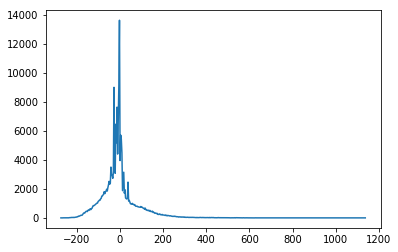

In [156]:
#2.e) plot histrogram of the image
flat = np.array(corr)
flat = flat.ravel()
y,x = np.histogram(flat,bins = 500)
x=x[:-1]
plt.plot(x,y)#more x since corralate increase the thrushold
#plt.hist(flat,bins = 256)
plt.show()

In [162]:
#2.f)change the other to zeros
cut = 1000
col = len(corr)
row = len(corr[0])
#output empty 2d array
out=[[0 for x in range(row)] for y in range(col)] 
n = 0
while n < col:
    i = 0
    while i < row:
        if(corr[n][i] > cut):
            out[n][i] = corr[n][i]
        i+=1
    n+=1
#everythng other than 2 should be zero

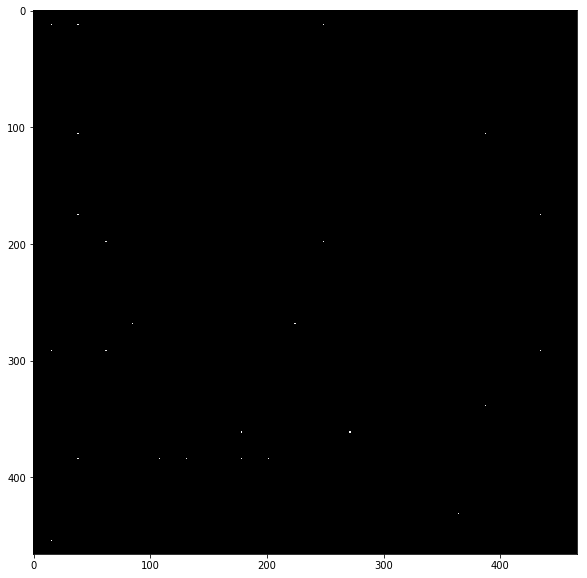

In [163]:
#2.g) plot the new image
plt.figure(figsize=(10,10))
plt.imshow(out)
plt.show()
#got rid of the 2 look alikes

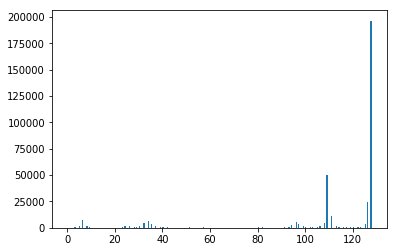

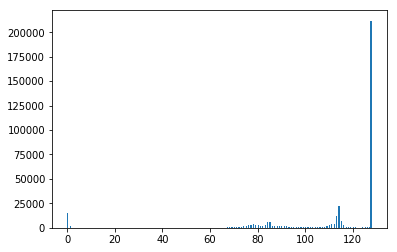

In [191]:
#3. male new images
ava=mpimg.imread("avocado_gray.png")
dice=mpimg.imread("dice_gray.png")
#gery scale them
ava = np.floor(rgb2gray(ava)*128+0.5)
dice = np.floor(rgb2gray(dice)*128+0.5)

flatten=np.array(ava)
flatten=flatten.ravel()
plt.hist(flatten,bins=256)
plt.show()
flatten=np.array(dice)
flatten=flatten.ravel()
plt.hist(flatten,bins=256)
plt.show()

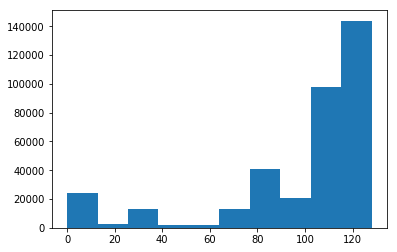

In [195]:
#should have same limits
col = len(ava)
row = len(ava[0])
#output empty 2d array
both=[[0 for x in range(row)] for y in range(col)] 
n = 0
while n < col:
    i = 0
    while i < row:
        if (dice[n][i] > 127):
            both[n][i] = ava[n][i]
        else:
            both[n][i] = dice[n][i]
        i+=1
    n+=1
flatten=np.array(both)
flatten=flatten.ravel()
plt.hist(flatten)
plt.show()

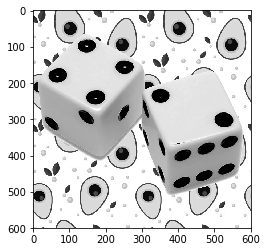

In [193]:
plt.imshow(both)
plt.show()